
1.


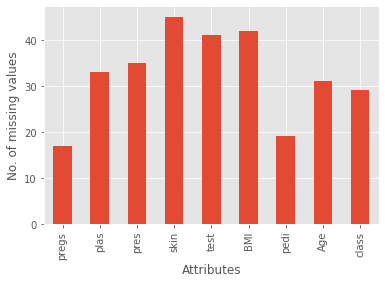


2.(a)
Total no. of tuples deleted = 39
Row numbers of deleted tuples :
 [3, 41, 42, 55, 56, 85, 91, 105, 127, 138, 147, 212, 213, 214, 215, 251, 252, 256, 282, 283, 286, 316, 323, 337, 431, 432, 451, 452, 453, 473, 474, 475, 476, 720, 721, 722, 723, 755, 768]

2.(b)
Total no. of tuples deleted = 21
Row numbers of deleted tuples :
 [10, 15, 30, 31, 37, 64, 94, 97, 109, 112, 132, 133, 134, 135, 151, 184, 190, 220, 310, 748, 750]

3.
Number of missing values in each attributes :
 pregs     0
plas     12
pres      9
skin      8
test      8
BMI      12
pedi      2
Age      18
class     0
dtype: int64

Total number of missing values in the file (after the deletion of tuples) = 69

4.(a)
(i) Mean:

pregs      3.885593
plas     120.666667
pres      69.001431
skin      20.348571
test      77.814286
BMI       32.009339
pedi       0.476042
Age       33.094203
class      0.343220
dtype: float64
pregs      3.845052
plas     120.894531
pres      69.105469
skin      20.536458
test      79.799479
BMI

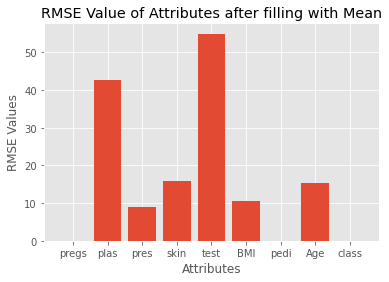


4.(b)
(i) Mean:

pregs      3.885593
plas     120.349576
pres      69.109463
skin      20.392655
test      77.355226
BMI       32.046328
pedi       0.477325
Age       33.216102
class      0.343220
dtype: float64
pregs      3.845052
plas     120.894531
pres      69.105469
skin      20.536458
test      79.799479
BMI       31.992578
pedi       0.471876
Age       33.240885
class      0.348958
dtype: float64 


Median:

pregs      3.0000
plas     117.0000
pres      72.0000
skin      23.0000
test      27.0000
BMI       32.2500
pedi       0.3825
Age       29.0000
class      0.0000
dtype: float64
pregs      3.0000
plas     117.0000
pres      72.0000
skin      23.0000
test      30.5000
BMI       32.0000
pedi       0.3725
Age       29.0000
class      0.0000
dtype: float64 


Mode:

   pregs   plas  pres  skin  test   BMI   pedi   Age  class
0    1.0   99.0  70.0   0.0   0.0  32.0  0.254  22.0    0.0
1    NaN  100.0   NaN   NaN   NaN   NaN  0.258   NaN    NaN
   pregs  plas  pres  skin  test   B

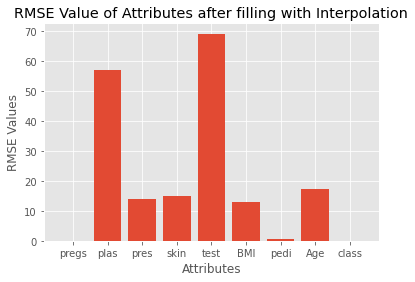


5.

Outliers in attribute "Age" :
 [69.0, 67.0, 72.0, 81.0, 67.0, 70.0, 68.0, 69.0]


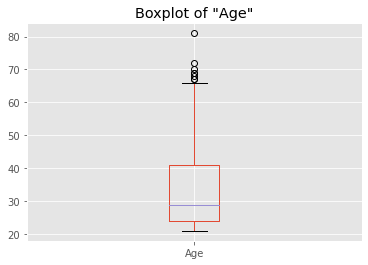

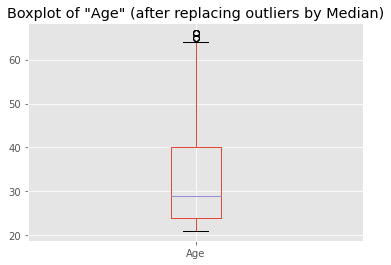


Outliers in attribute "BMI" :
 [0.0, 0.0, 0.0, 53.2, 67.1, 52.3, 52.3, 52.9, 0.0, 0.0, 59.4, 0.0, 0.0, 57.3, 0.0, 0.0]


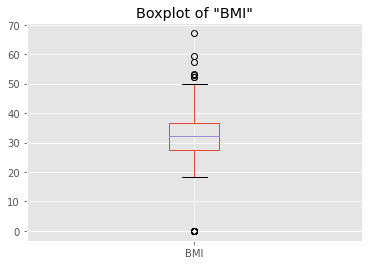

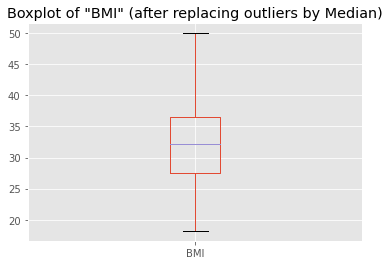

In [1]:

#________________________________________________________
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

data = pd.read_csv('pima_indians_diabetes_miss.csv')
dataOrg = pd.read_csv('pima_indians_diabetes_original.csv')

attributes =['pregs','plas','pres','skin','test','BMI','pedi','Age','class']

# Q1._________________________________________________________________________
print('\n1.')
missVal = data.isnull().sum()  # tells no.of missing values in each attribute
missVal.plot.bar()             # bar graph 
plt.xlabel('Attributes')
plt.ylabel('No. of missing values')
plt.show()

# Q2.(a)______________________________________________________________________

l=[]                  # list containing no. of missing values for each row
for i in range(len(data.index)):
    l.append(data.iloc[i].isnull().sum())

data1=data.copy()
n=0                   # final 'n' will give total no. of rows deleted
row_num_del1=[]       # this list contains row nos. of deleted tuples
for i in range(768):
    if l[i] >= 3:
        data1=data1.drop(i,axis=0)
        n+=1
        row_num_del1.append(i+2)
        
print('\n2.(a)\nTotal no. of tuples deleted =',n)
print('Row numbers of deleted tuples :\n',row_num_del1)

# (b)_____________________________________

indexNames = data1[data1['class'].isnull()].index  # It gives index of empty cells in 'class' column
data1=data1.drop(indexNames)

row_num_del2=[]
for i in indexNames:
    row_num_del2.append(i+2)
    
print('\n2.(b)\nTotal no. of tuples deleted =',len(indexNames))
print('Row numbers of deleted tuples :\n',row_num_del2)

# Q3.________________________________________________________________________

print('\n3.\nNumber of missing values in each attributes :\n',data1.isnull().sum())

print('\nTotal number of missing values in the file (after the deletion of tuples) =',data1.isnull().sum().sum())


# Q4.(a)______________________________________________________________________
data_4a = data1.copy()

# Replacing the missing values by mean of their respective attribute.
for i in attributes:
    data_4a[i] = data_4a[i].fillna(data_4a[i].mean())

print('\n4.(a)\n(i) Mean:\n')
print(data_4a.mean())
print(dataOrg.mean(),'\n\n')

print('Median:\n')
print(data_4a.median())
print(dataOrg.median(),'\n\n')

print('Mode:\n')
print(data_4a.mode())
print(dataOrg.mode(),'\n\n')

print('Standard Deviation:\n')
print(data_4a.std())
print(dataOrg.std(),'\n\n')

print('(ii)')
# this function will give RMSE value for a particular attribute
def RMSE_4a(attrb):   
    l1= list(data1[data1[attrb].isnull()].index)
    Na = 0
    sqSum=0
    if l1==[]:
        return 0
    else:
        for i in l1:
            sq = (data_4a[attrb][i]-dataOrg[attrb][i])**2
            sqSum += sq
            Na+=1
        rmse = (sqSum/Na)**0.5
        return rmse

y1=[]      # this list contains RMSE values of each attribute
for i in attributes:
    y1.append(RMSE_4a(i))

plt.bar(attributes,y1)
plt.xlabel('Attributes')
plt.ylabel('RMSE Values')
plt.title("RMSE Value of Attributes after filling with Mean")
plt.show()

# (b)_____________________________________
data_4b = data1.copy()

# Replacing the missing values in each attribute using linear interpolation technique
for i in attributes:
    data_4b[i] = data_4b[i].fillna(data_4b[i].interpolate())

print('\n4.(b)\n(i) Mean:\n')
print(data_4b.mean())
print(dataOrg.mean(),'\n\n')

print('Median:\n')
print(data_4b.median())
print(dataOrg.median(),'\n\n')

print('Mode:\n')
print(data_4b.mode())
print(dataOrg.mode(),'\n\n')

print('Standard Deviation:\n')
print(data_4b.std())
print(dataOrg.std(),'\n\n')

print('(ii)')
# this function will give RMSE value for a particular attribute
def RMSE_4b(attrb):
    l1= list(data1[data1[attrb].isnull()].index)
    Na = 0
    sqSum=0
    if l1==[]:
        return 0
    else:
        for i in l1:
            sq = (data_4b[attrb][i]-dataOrg[attrb][i])**2
            sqSum += sq
            Na+=1
        rmse = (sqSum/Na)**0.5
        return rmse

y2=[]          # this list contains RMSE values of each attribute
for i in attributes:
    y2.append(RMSE_4b(i))

plt.bar(attributes,y2)
plt.xlabel('Attributes')
plt.ylabel('RMSE Values')
plt.title("RMSE Value of Attributes after filling with Interpolation")
plt.show()

# Q5.________________________________________________________________________

# this function will give outliers, boxplots before and after replacing outliers by meadian 
# for a particular attribute
def Outliers(attri):
    q1 = data_4b[attri].quantile(.25) # 1st quartile
    q2 = data_4b[attri].quantile(.5)  # 2nd quartile
    q3 = data_4b[attri].quantile(.75) # 3rd quartile
    
    outlr=[]                          # this list contains outliers
    for i in data_4b[attri]:
        if i > q3+1.5*(q3-q1) or i < q1-1.5*(q3-q1) :
            outlr.append(i)
    
    print('\nOutliers in attribute "'+attri+'" :\n', outlr)
    data_4b.boxplot(column=attri)
    plt.title('Boxplot of "'+attri+'"')
    plt.show()
    
    for j in data_4b[attri].index:
        if data_4b[attri][j] in outlr:
            data_4b[attri][j] = q2
            
    data_4b.boxplot(column=attri)
    plt.title('Boxplot of "'+attri+'" (after replacing outliers by Median)')
    plt.show()    

print('\n5.')        
Outliers('Age')
Outliers('BMI')

#_____________________________________________________________________________